In [64]:
#Imports and preamble
import pandas as pd
import matplotlib.pyplot as plt


In [65]:
# Load data for GDP and remove everything that isn't related to the year 2017
gdp = pd.read_csv("data/gdp-per-capita-worldbank.csv")
gdp_year_not_than_2017 = gdp[ gdp['Year'] != 2017]
gdp = gdp.drop(gdp_year_less_than_2017.index, axis=0)



In [66]:
# Load data for Life Expectancy and remove everything that isn't related to the year 2017
le = pd.read_csv("data/life-expectancy.csv")
year_counts = le['Year'].value_counts()

le_year_not_than_2017 = le[ le['Year'] != 2017]
le = le.drop(le_year_less_than_2017.index, axis=0)




In [74]:
# Find countries with life expectancy one standard deviation above the mean (in 2017)
mean = le["Life expectancy (years)"].mean()
std = le["Life expectancy (years)"].std()
le_one_std_above_mean = le[le["Life expectancy (years)"] > mean+std]
print(le_one_std_above_mean)



Entity      Code  Year  Life expectancy (years)
492             Andorra       AND  2011                   81.837
633            Anguilla       AIA  2011                   81.007
1104          Australia       AUS  2011                   82.119
1184            Austria       AUT  2011                   80.776
1784            Belgium       BEL  2011                   80.261
1994            Bermuda       BMU  2011                   81.284
3036             Canada       CAN  2011                   81.510
3176     Cayman Islands       CYM  2011                   82.720
3386    Channel Islands  OWID_CIS  2011                   81.688
5558   Falkland Islands       FLK  2011                   80.286
5783            Finland       FIN  2011                   80.365
5987             France       FRA  2011                   81.692
6416            Germany       DEU  2011                   80.261
6642             Greece       GRC  2011                   80.754
6852         Guadeloupe       GLP  2011   

In [67]:
# Merge GDP with LE
le_gdp = pd.merge(left=gdp, right=le, left_on=["Year", "Code", "Entity"], right_on=["Year", "Code", "Entity"])




<function matplotlib.pyplot.show(*args, **kw)>

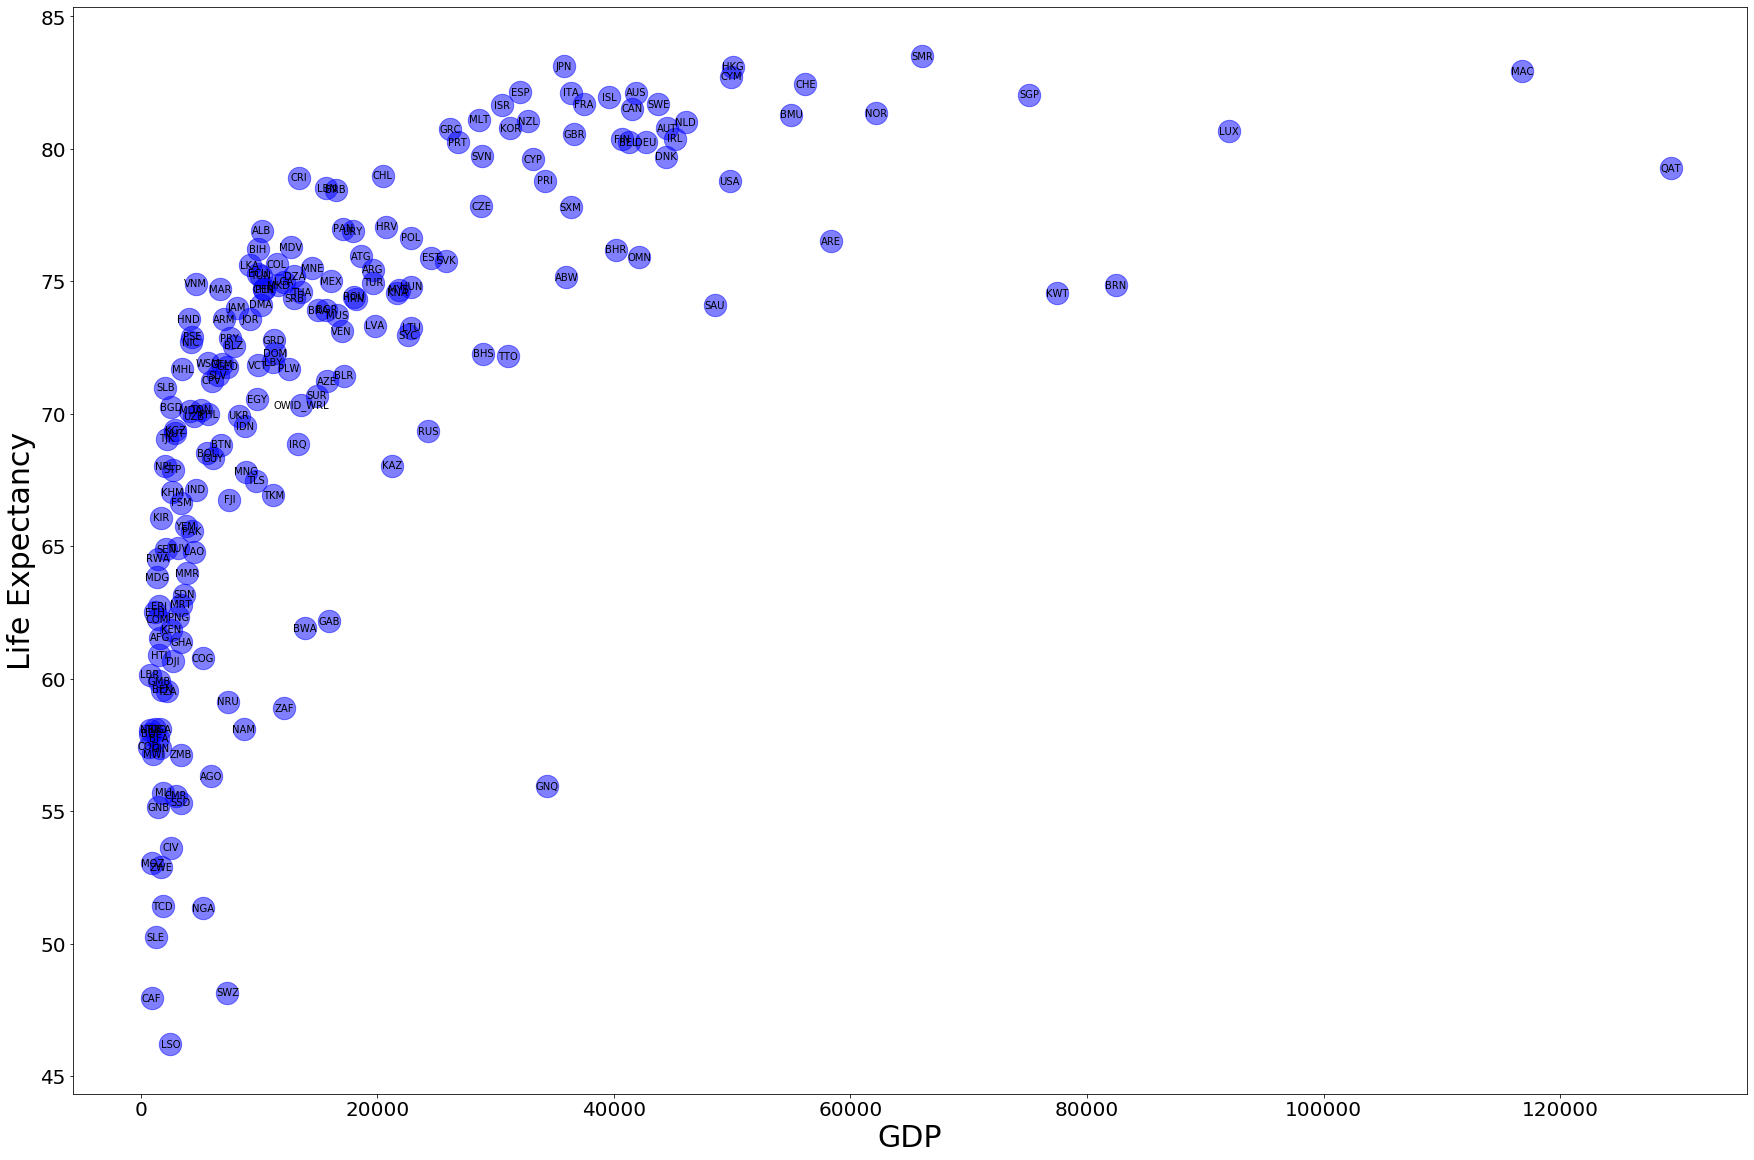

In [68]:
#Make the plot
x = le_gdp["GDP per capita (int.-$) (constant 2011 international $)"]
y = le_gdp["Life expectancy (years)"]

plt.figure(figsize=(30,20))
plt.scatter(x, y, s=500, color="b", alpha=0.5)
plt.xlabel("GDP",fontsize=30)
plt.ylabel("Life Expectancy", fontsize=30)
plt.tick_params(axis="both",which="major",labelsize=20)

#Puts the country code on the points, this for loop takes some time to run
for i, code in enumerate(le_gdp["Code"]):
    plt.annotate(code, (x[i], y[i]), fontsize=10, ha="center", va="center")

plt.show